In [2]:
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def readEDF(fileName):
    Rawdata = mne.io.read_raw_edf(fileName)
    signals, times = Rawdata[:]
    RecFile = fileName[0:-3] + "rec"
    eventData = np.genfromtxt(RecFile, delimiter=",")
    Rawdata.close()
    return [signals, times, eventData, Rawdata]

def convert_signals(signals, Rawdata):
    signal_names = {
        k: v
        for (k, v) in zip(
            Rawdata.info["ch_names"], list(range(len(Rawdata.info["ch_names"])))
        )
    }
    new_signals = np.vstack(
        (
            signals[signal_names["EEG FP1-REF"]]
            - signals[signal_names["EEG F7-REF"]],  # 0
            (
                signals[signal_names["EEG F7-REF"]]
                - signals[signal_names["EEG T3-REF"]]
            ),  # 1
            (
                signals[signal_names["EEG T3-REF"]]
                - signals[signal_names["EEG T5-REF"]]
            ),  # 2
            (
                signals[signal_names["EEG T5-REF"]]
                - signals[signal_names["EEG O1-REF"]]
            ),  # 3
            (
                signals[signal_names["EEG FP2-REF"]]
                - signals[signal_names["EEG F8-REF"]]
            ),  # 4
            (
                signals[signal_names["EEG F8-REF"]]
                - signals[signal_names["EEG T4-REF"]]
            ),  # 5
            (
                signals[signal_names["EEG T4-REF"]]
                - signals[signal_names["EEG T6-REF"]]
            ),  # 6
            (
                signals[signal_names["EEG T6-REF"]]
                - signals[signal_names["EEG O2-REF"]]
            ),  # 7
            (
                signals[signal_names["EEG FP1-REF"]]
                - signals[signal_names["EEG F3-REF"]]
            ),  # 14
            (
                signals[signal_names["EEG F3-REF"]]
                - signals[signal_names["EEG C3-REF"]]
            ),  # 15
            (
                signals[signal_names["EEG C3-REF"]]
                - signals[signal_names["EEG P3-REF"]]
            ),  # 16
            (
                signals[signal_names["EEG P3-REF"]]
                - signals[signal_names["EEG O1-REF"]]
            ),  # 17
            (
                signals[signal_names["EEG FP2-REF"]]
                - signals[signal_names["EEG F4-REF"]]
            ),  # 18
            (
                signals[signal_names["EEG F4-REF"]]
                - signals[signal_names["EEG C4-REF"]]
            ),  # 19
            (
                signals[signal_names["EEG C4-REF"]]
                - signals[signal_names["EEG P4-REF"]]
            ),  # 20
            (signals[signal_names["EEG P4-REF"]] - signals[signal_names["EEG O2-REF"]]),
        )
    )  # 21
    return new_signals

In [6]:
def plot_eeg_with_events(path, start_time=None, end_time=None):
    # Load the EDF file
    [signals, times, events, Rawdata] = readEDF(path)
    signals = convert_signals(signals, Rawdata)
    
    # Define colors for each label
    label_colors = {
        1: 'red',    # spsw
        2: 'blue',   # gped
        3: 'green',  # pled
        4: 'yellow', # eyem
        5: 'purple', # artf
        6: 'gray'    # bckg
    }
    
    # Define label names for the legend
    label_names = {
        1: 'spsw',
        2: 'gped',
        3: 'pled',
        4: 'eyem',
        5: 'artf',
        6: 'bckg'
    }
    
    num_channels = signals.shape[0]
    fig, axes = plt.subplots(num_channels, 1, figsize=(15, 3 * num_channels), sharex=True)
    
    for i, ax in enumerate(axes):
        # Plot each channel's signal
        ax.plot(times, signals[i], color='black', label=f'Channel {i+1}')
        
        # Overlay the events with colored backgrounds
        for event in events:
            channel, start_time_event, stop_time_event, label = event
            if int(channel) == i + 1:  # Check if the event is for the current channel
                color = label_colors.get(int(label), 'black')  # Default to black if label not found
                ax.axvspan(start_time_event, stop_time_event, color=color, alpha=0.3)
        
        ax.set_ylabel('Magnitude')
        ax.set_title(f'Channel {i+1}')
    
    # Create custom legend for event labels
    handles = [plt.Line2D([0], [0], color=color, lw=4, label=label_names[label]) 
               for label, color in label_colors.items()]
    fig.legend(handles=handles, loc='upper right', title='Event Labels')
    
    plt.xlabel('Time (s)')
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust layout to make space for sliders

    # Set x-axis limits if start_time and end_time are provided
    if start_time is not None and end_time is not None:
        for ax in axes:
            ax.set_xlim(start_time, end_time)

    plt.show()

Extracting EDF parameters from /workspaces/BIOT/datasets/TUEV/edf/train/aaaaaabs/aaaaaabs_00000001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


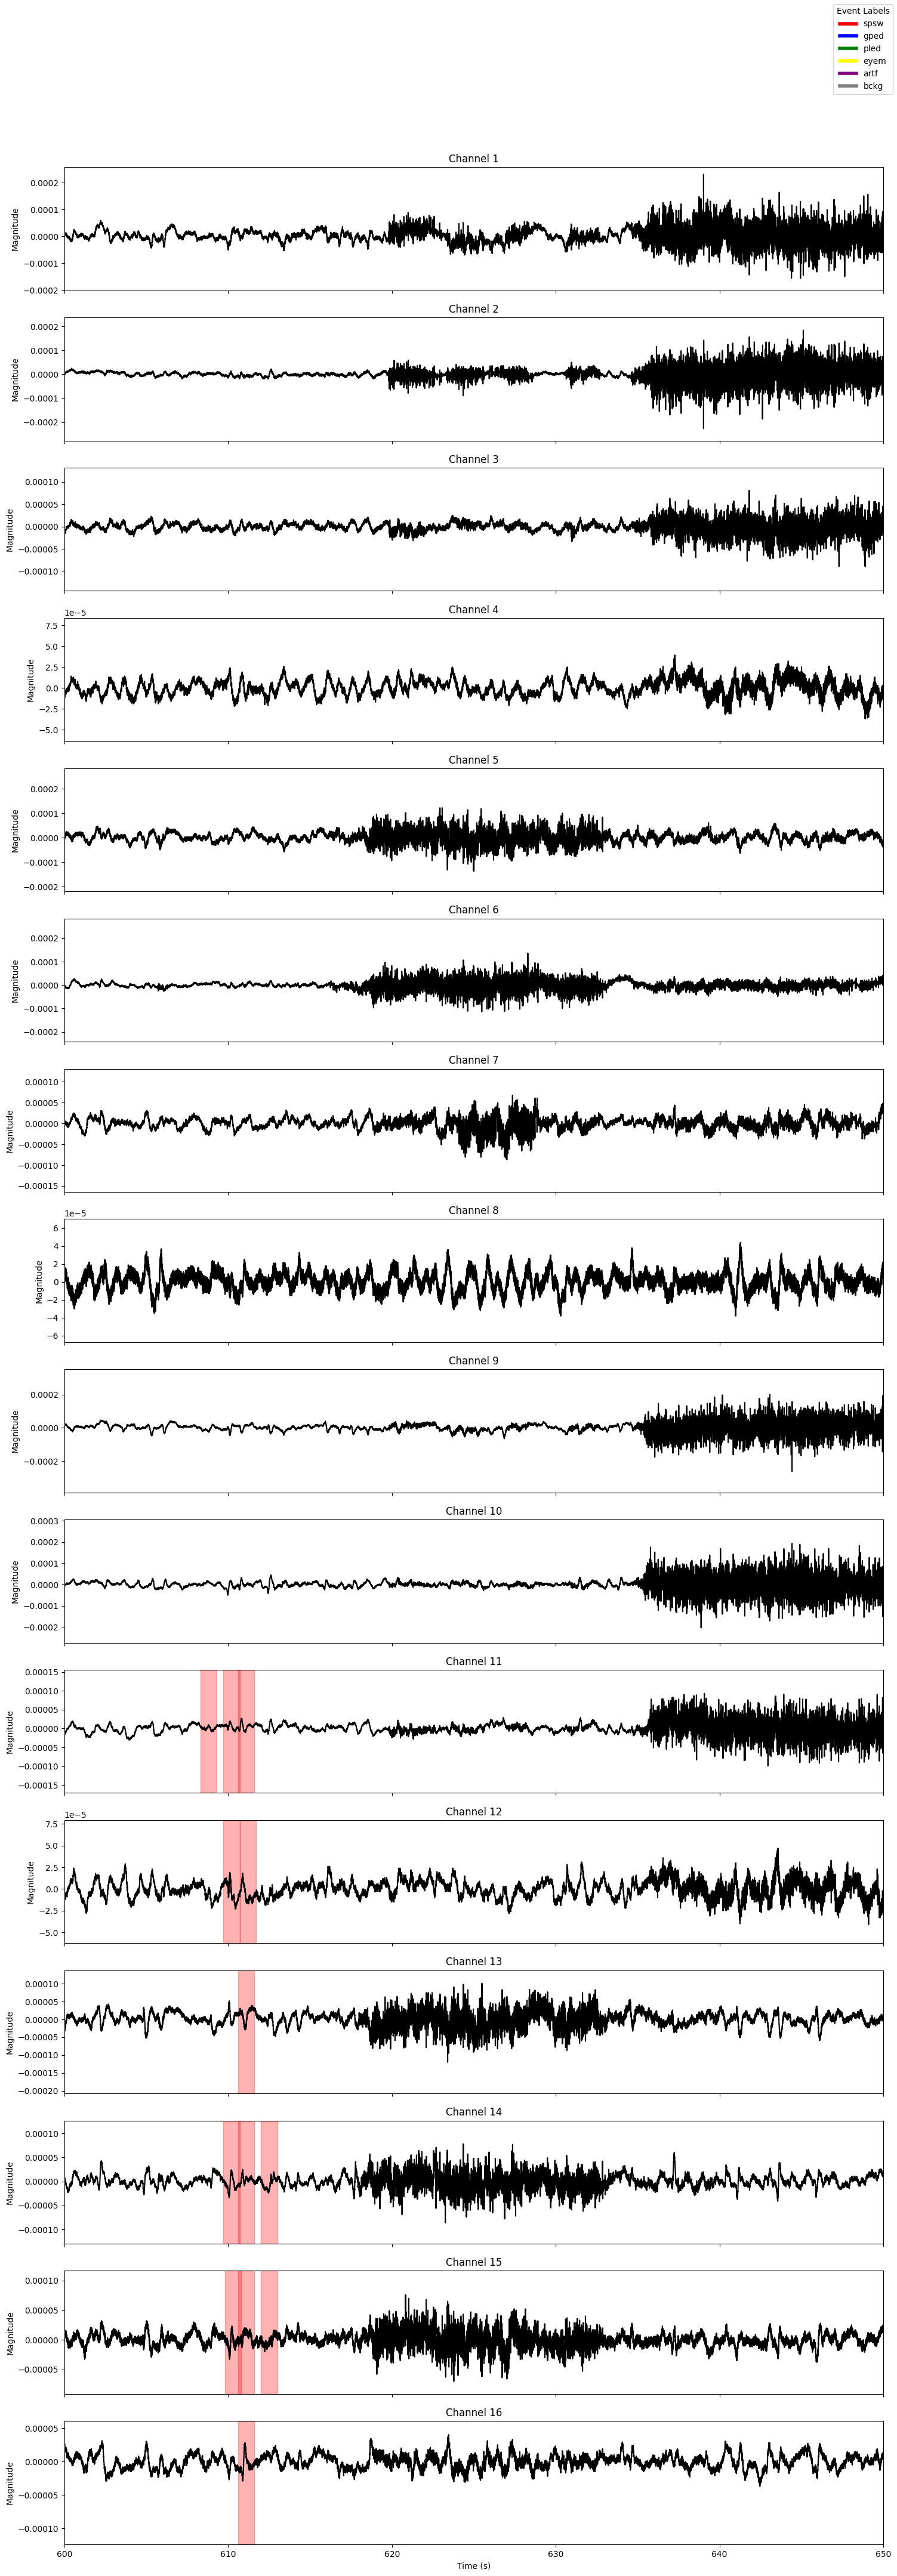

In [7]:
plot_eeg_with_events("datasets/TUEV/edf/train/aaaaaabs/aaaaaabs_00000001.edf", 600, 650)

In [8]:
import os

# Get list of folders in the train directory
train_folders = sorted(os.listdir("datasets/TUEV/edf/train"))
for folder in train_folders:
    print(folder)


Folders in datasets/TUEV/edf/train:
aaaaaaar
aaaaaabs
aaaaaaci
aaaaaadd
aaaaaadg
aaaaaadk
aaaaaadm
aaaaaadn
aaaaaads
aaaaaadt
aaaaaadx
aaaaaadz
aaaaaaer
aaaaaaet
aaaaaaff
aaaaaafi
aaaaaafx
aaaaaagq
aaaaaagx
aaaaaahm
aaaaaahp
aaaaaahr
aaaaaaie
aaaaaajc
aaaaaajg
aaaaaako
aaaaaalp
aaaaaamc
aaaaaamd
aaaaaamm
aaaaaaof
aaaaaaoy
aaaaaaqg
aaaaaaqz
aaaaaasu
aaaaaatm
aaaaaatx
aaaaaaug
aaaaaauq
aaaaaaur
aaaaaavn
aaaaaavs
aaaaaavw
aaaaaawk
aaaaaawm
aaaaaawq
aaaaaaws
aaaaaawx
aaaaaaxh
aaaaaaxp
aaaaaaxq
aaaaaayn
aaaaaazl
aaaaabba
aaaaabbn
aaaaabbu
aaaaabbw
aaaaabcv
aaaaabdo
aaaaabea
aaaaabel
aaaaabfa
aaaaabfp
aaaaabfu
aaaaabfy
aaaaabgg
aaaaabgo
aaaaabgq
aaaaabgx
aaaaabgz
aaaaabhu
aaaaabix
aaaaabjc
aaaaabjd
aaaaabji
aaaaabju
aaaaabky
aaaaablf
aaaaablw
aaaaabna
aaaaabom
aaaaaboo
aaaaabop
aaaaaboq
aaaaabor
aaaaabos
aaaaabqd
aaaaabqo
aaaaabqq
aaaaabqs
aaaaabrj
aaaaabrr
aaaaabsw
aaaaabsy
aaaaabtg
aaaaabth
aaaaabtr
aaaaabtw
aaaaabun
aaaaabuu
aaaaabvg
aaaaabxb
aaaaabxc
aaaaabxd
aaaaabyi
aaaaabyj
aaaaabym
a

In [3]:
raw = mne.io.read_raw_edf("datasets/TUEV/edf/train/aaaaaabs/aaaaaabs_00000001.edf", preload=True)
raw.info

Extracting EDF parameters from /workspaces/BIOT/datasets/TUEV/edf/train/aaaaaabs/aaaaaabs_00000001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 201499  =      0.000 ...   805.996 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2013-01-01 00:00:00 UTC
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>

In [11]:
raw.info["sfreq"]

250.0